# Events / day

The following code displays the amount of events per day

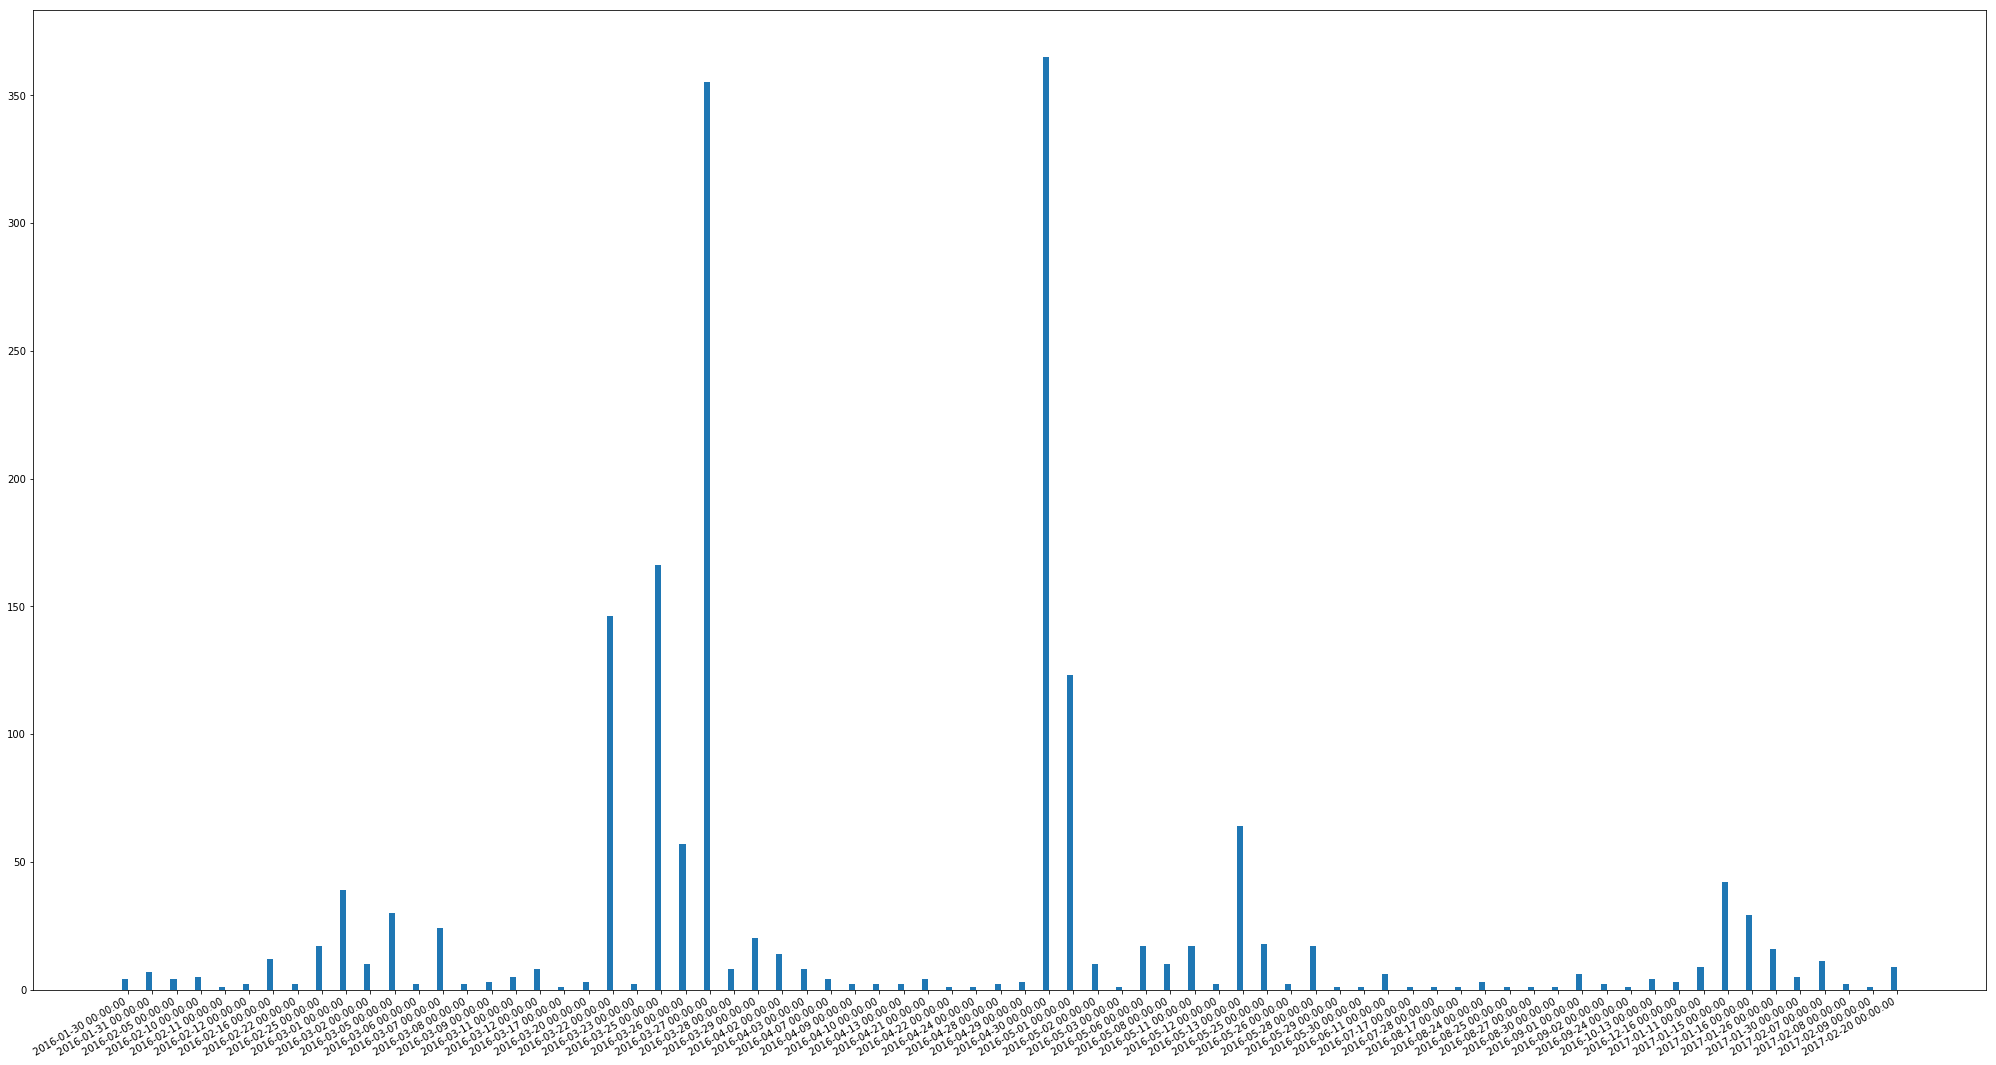

In [1]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

infile = r"../include/php_error.log"

event_date_list = []
event_count = []
previous_match = False


    
with open(infile) as f:
    f = f.readlines()

    
for idx, line in enumerate(f):
        match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
        if match:
            if not previous_match or match != previous_match:
                dt = parse(match[0])
                event_date_list.append(dt)
                event_count.append(1)
                previous_match = match
            else:
                event_count[-1] = event_count[-1] + 1
                

fig = plt.figure(figsize=(35,20))

width = .25
ind = np.arange(len(event_count))
plt.bar(ind, event_count, width=width)
plt.xticks(ind + width / 2, event_date_list)

fig.autofmt_xdate()

plt.show()


# Excluding certain days

The following code excludes exceptional high event days to increase output detail

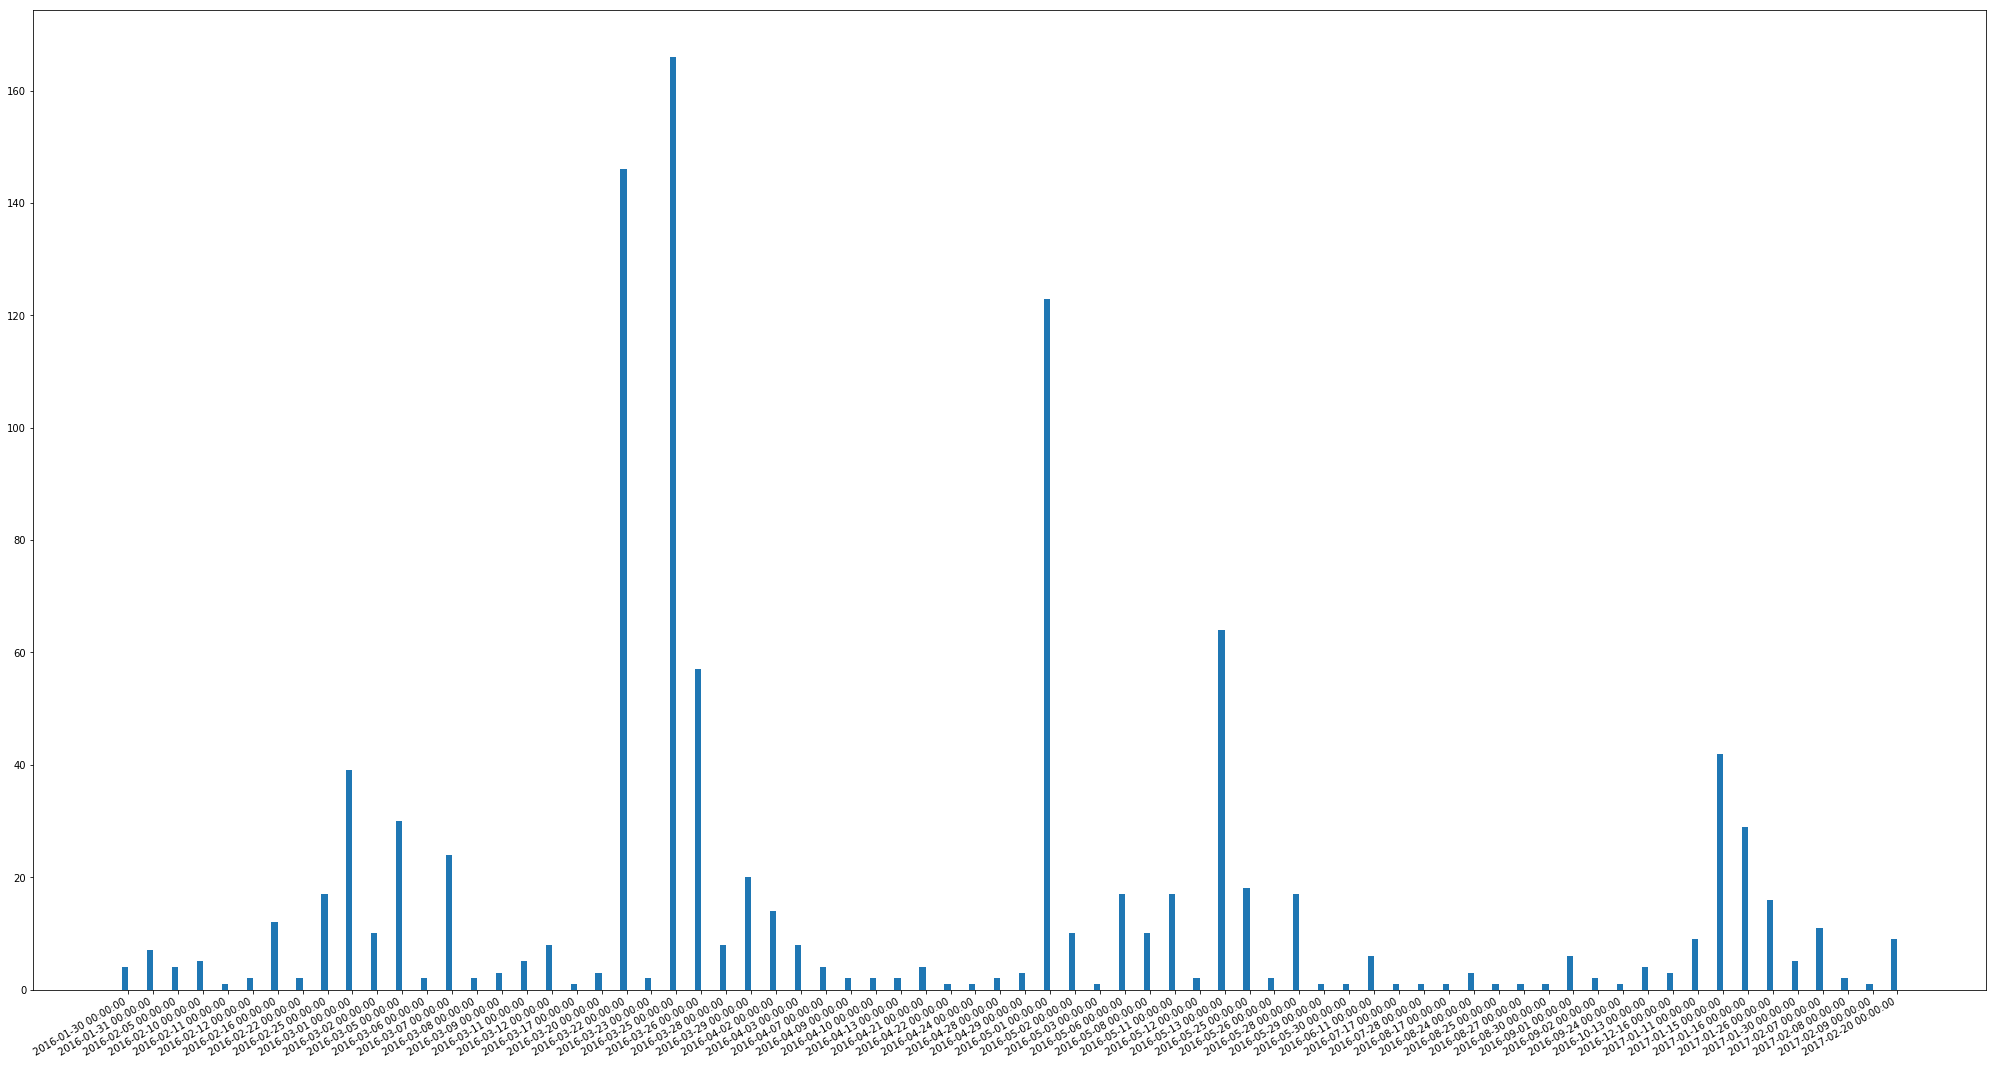

In [2]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

infile = r"../include/php_error.log"

restricted_days_list = ['27-Mar-2016', '30-Apr-2016']
event_date_list = []
event_count = []
previous_match = False

    
with open(infile) as f:
    f = f.readlines()

    
for idx, line in enumerate(f):
        match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
        if match:
            if str(match[0]) not in restricted_days_list:
                if not previous_match or match != previous_match:
                    dt = parse(match[0])
                    event_date_list.append(dt)
                    event_count.append(1)
                    previous_match = match
                else:
                    event_count[-1] = event_count[-1] + 1

fig = plt.figure(figsize=(35,20))

width = .25
ind = np.arange(len(event_count))
plt.bar(ind, event_count, width=width)
plt.xticks(ind + width / 2, event_date_list)

fig.autofmt_xdate()

plt.show()


In [3]:
import sys
import time
import logging
from watchdog.observers import Observer
from watchdog.events import LoggingEventHandler

print("ran")

if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s - %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')
    path = "../include/php_error.log"
    event_handler = LoggingEventHandler()
    observer = Observer()
    observer.schedule(event_handler, path, recursive=True)
    observer.start()
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        observer.stop()
    observer.join()

ran


NotADirectoryError: [Errno 20] Not a directory: '../include/php_error.log'